In [76]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
os.chdir('C:\\Users\\anush\\OneDrive\\Desktop\\Python Case Study\\Case Study 3 - Insurance Claims Case Study')

In [78]:
claims_df = pd.read_csv('claims.csv')
custdem_df = pd.read_csv('cust_demographics.csv')

In [79]:
claims_df.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

In [80]:
custdem_df.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment'], dtype='object')

In [81]:
custdem_df.rename(columns={'CUST_ID':'customer_id'},inplace=True)

In [82]:
custdem_df.columns

Index(['customer_id', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment'], dtype='object')

In [83]:
final_df = pd.merge(left=claims_df,right=custdem_df,on='customer_id',how='inner')

In [84]:
final_df.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver


In [85]:
final_df.shape
print('The final_df has',final_df.shape[0],'rows and',final_df.shape[1],'columns.')

The final_df has 1085 rows and 15 columns.


#### Dataframe Info

In [86]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

#### Observations
1. The datatype for claim_date is incorrect. Should be datetime not object.
2. The datatype for claim_amount is incorrect. Should be float not object.
3. The datatype for DateOfBirth is incorrect. Should be datetime not object.

#### Changing Datatype

In [87]:
final_df.claim_date=final_df.claim_date.str.replace('/','-')

In [88]:
final_df.claim_date = pd.to_datetime(final_df.claim_date,format='%m-%d-%Y')

In [89]:
final_df.claim_amount = final_df.claim_amount.str.replace('$','')

In [90]:
final_df.claim_amount = final_df.claim_amount.astype(float)

In [91]:
final_df.DateOfBirth = pd.to_datetime(final_df.DateOfBirth,format='%d-%b-%y')

#### Checking Datatypes again

In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

#### The datatypes are now corrected

#### Q4 Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [93]:
final_df['alert_flag'] = np.where((final_df.claim_type == 'Injury only') & (final_df.police_report == 'Yes'),0,1)

#### Q5 One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [166]:
sorted_df = final_df.sort_values(by='claim_date',ascending=False)
final_df = sorted_df.groupby(by='customer_id',as_index=False).first()
final_df.head(3)

,customer_id,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,Age,Age_Group
0,154557,69348631,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,47,Adult
1,263204,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,1,53,Adult
2,287476,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,1,37,Adult


In [146]:
final_df.shape

(1078, 16)

#### Q6 Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

##### Checking for missing values

In [147]:
final_df.isna().sum()

customer_id             0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alert_flag              0
dtype: int64

In [148]:
# Replacing continous values with mean
final_df = final_df.fillna(final_df.claim_amount.mean().round(2))

In [149]:
# Replacing categorical values with mode
final_df = final_df.fillna(final_df.total_policy_claims.mode()[0])

#### Q7 Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
##### Children < 18 
##### Youth 18-30
##### Adult 30-60
##### Senior > 60

 


In [150]:
final_df['Age'] = (pd.Timestamp.today().year - final_df.DateOfBirth.dt.year)
final_df['Age_Group'] = np.where(final_df.Age < 18,'Children',np.where((final_df.Age > 18) & (final_df.Age <=30),'Youth',np.where((final_df.Age > 30) & (final_df.Age <= 60),'Adult','Senior')))

#### Q8 What is the average amount claimed by the customers from various segments?

In [151]:
avg_amt_by_segment = final_df[['Segment','claim_amount']].groupby(by='Segment').mean().round(2)
avg_amt_by_segment

,claim_amount
Segment,
Gold,12846.40
Platinum,12371.65
Silver,12267.86


#### Q9 What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [165]:
df_by_date = final_df[final_df.claim_date <= (pd.to_datetime('2018-10-01') - pd.DateOffset(days=20))] 
df_by_date[['incident_cause','claim_amount']].groupby(by='incident_cause').sum()

,claim_amount
incident_cause,
Crime,721938.65
Driver error,3315850.76
Natural causes,1312987.07
Other causes,3723151.87
Other driver error,3277536.49


#### Q10 How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [153]:
df_by_city = final_df[(final_df.State == 'TX') | (final_df.State == 'DE') | (final_df.State == 'AK')]
df_by_cause = df_by_city[(df_by_city.incident_cause == 'Driver error') | (df_by_city.incident_cause == 'Other driver error')]
df_by_agegroup = df_by_cause[df_by_cause.Age_Group == 'Adult']
result_df = df_by_agegroup[['incident_cause','customer_id']].groupby(by='incident_cause').count().rename(columns={'customer_id':'Count_of_Adults'})
result_df

,Count_of_Adults
incident_cause,
Driver error,14
Other driver error,10


#### Q11 Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [154]:
grouped_df = final_df[['gender','Segment','claim_amount']].groupby(by=['gender','Segment']).sum()
grouped_df

claim_amount
gender Segment               
Female Gold        2110044.57
       Platinum    2369722.11
       Silver      1897544.99
Male   Gold        2655969.99
       Platinum    2096445.34
       Silver      2347134.45

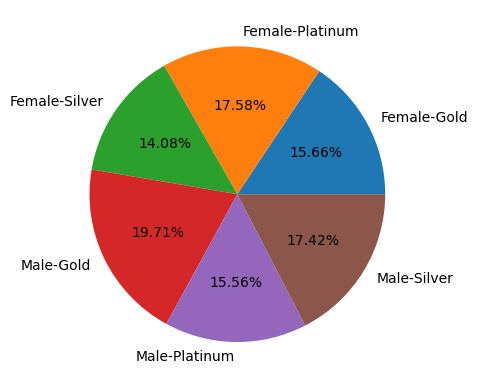

In [65]:
label=['Female-Gold','Female-Platinum','Female-Silver','Male-Gold','Male-Platinum','Male-Silver']
plt.pie(x=grouped_df.claim_amount,labels=label,autopct='%0.2f%%')
plt.show()

#### Q12  Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

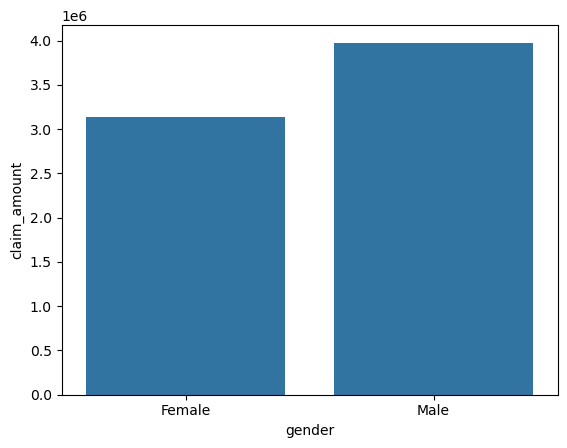

In [66]:
df_by_incident = final_df[(final_df.incident_cause == 'Driver error') | (final_df.incident_cause == 'Other driver error')]
grouped_df_bygender = df_by_incident[['gender','claim_amount']].groupby(by='gender').sum()
sns.barplot(data=grouped_df_bygender,x='gender',y='claim_amount')
plt.show()

#### Q13 Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

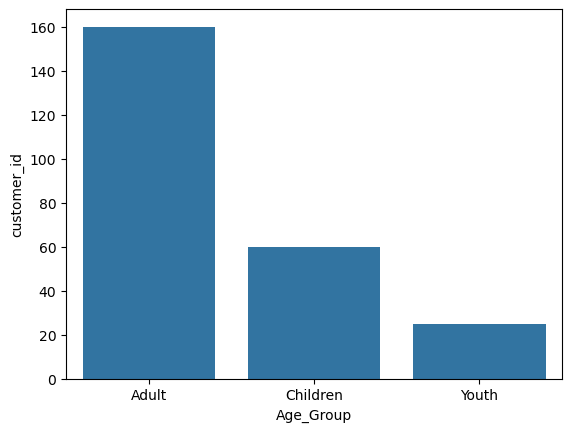

In [67]:
fraud_claim_df = final_df[final_df.fraudulent == 'Yes']
fclaims_by_age = fraud_claim_df[['Age_Group','customer_id']].groupby(by='Age_Group').count()
fclaims_by_age
sns.barplot(data=fclaims_by_age,x='Age_Group',y='customer_id')
plt.show()

#### Q14 Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.  

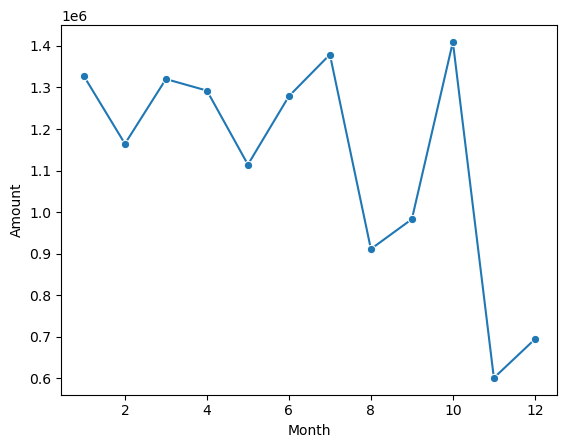

In [68]:
final_df['month_num'] = final_df.claim_date.dt.month
claims_by_month = final_df[['month_num','claim_amount']].groupby(by='month_num').sum()
sns.lineplot(data=claims_by_month,x='month_num',y='claim_amount',marker='o',)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

#### Q15 What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [69]:
fraud_claims_df = final_df[final_df.fraudulent == 'Yes']
nonfraud_claims_df = final_df[final_df.fraudulent == 'No']
grouped_df1 = fraud_claims_df[['gender','Age_Group','claim_amount']].groupby(by=['gender','Age_Group']).mean().rename(columns={'claim_amount':'Fraud_Claims_Amount'})
grouped_df2 = nonfraud_claims_df[['gender','Age_Group','claim_amount']].groupby(by=['gender','Age_Group']).mean().rename(columns={'claim_amount':'Non_Fraud_Claims_Amount'})

<Figure size 800x500 with 0 Axes>

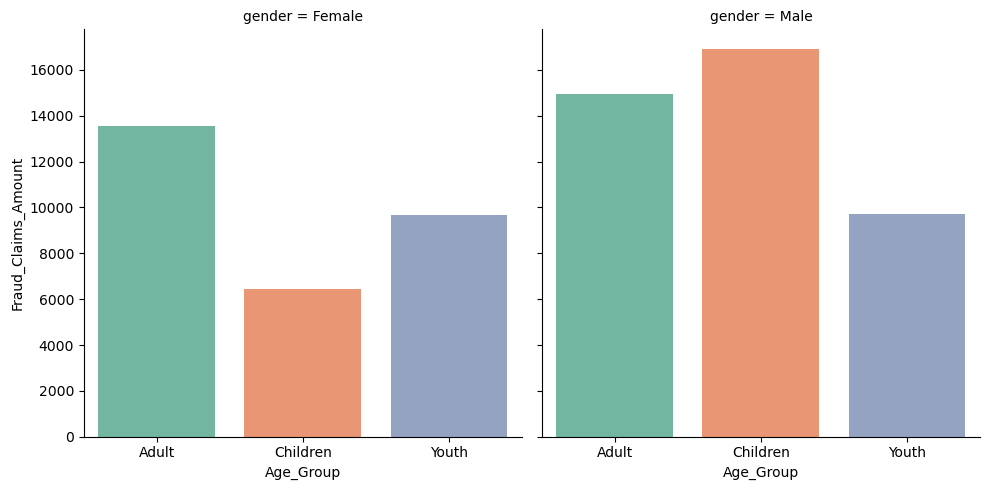

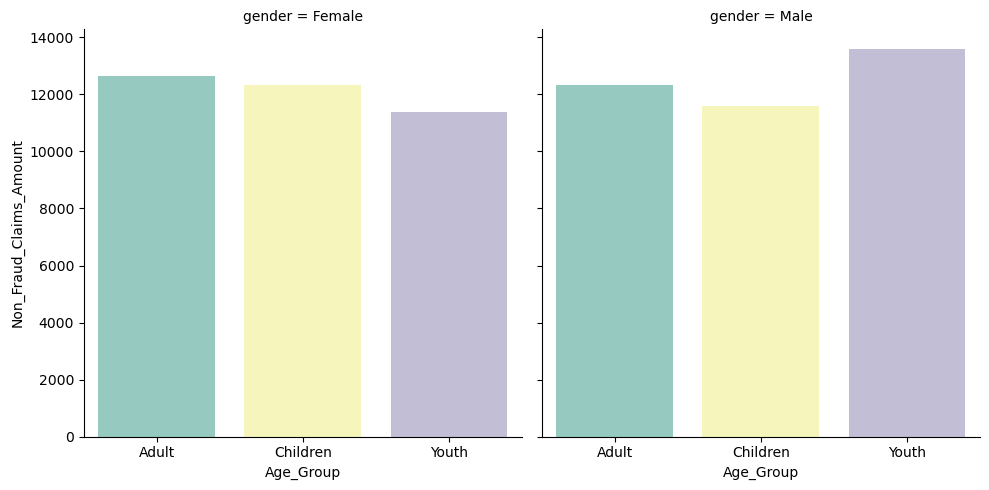

In [75]:
plt.figure(figsize=(8,5))
sns.catplot(data=grouped_df1,kind='bar',x='Age_Group',y='Fraud_Claims_Amount',col='gender',hue='Age_Group',palette='Set2')
plt.show()
sns.catplot(data=grouped_df2,kind='bar',x='Age_Group',y='Non_Fraud_Claims_Amount',col='gender',hue='Age_Group',palette='Set3')
plt.show()


#### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

#### 16. Is there any similarity in the amount claimed by males and females?

In [336]:
import scipy.stats as stats

In [339]:
# Sample
s1 = final_df[final_df['gender'] == 'Male'].claim_amount
s2 = final_df[final_df['gender'] == 'Female'].claim_amount

In [340]:
pcritical = 0.05
r1 = stats.ttest_ind(s1,s2)
pvalue = r1.pvalue

In [341]:
pvalue > pcritical  #p is high null will fly. Ho is accepted

True

#### 17. Is there any relationship between age category and segment?

In [342]:
#CI= 95%
#SL= 5%
pcritical= 0.05
final_df[['Age_Group','Segment']]

,Age_Group,Segment
0,Adult,Platinum
1,Adult,Silver
2,Adult,Silver
3,Adult,Gold
4,Adult,Gold
...,...,...
1073,Children,Silver
1074,Children,Gold
1075,Children,Silver
1076,Youth,Gold


In [222]:
ob_freq = pd.crosstab(final_df.Age_Group,final_df.Segment)
r2 = stats.chi2_contingency(ob_freq)
pvalue = r2[1]
pvalue > pcritical  # p is high null will fly. Ho is accepted.

True

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [319]:
pcritical = 0.05
ttest,pvalue = stats.ttest_1samp(final_df.claim_amount,popmean=10000)

In [321]:
pvalue < pcritical  # p is low,null will go. Ha is accepted

True

#### 19. Is there any difference between age groups and insurance claims?

In [250]:
pcritical= 0.05
ob_freq = pd.crosstab(final_df.Age_Group,final_df.claim_type)
r3 = stats.chi2_contingency(ob_freq)
pvalue = r3[1]

In [251]:
pvalue > pcritical  #p is low null will go. Ha is accepted

False

#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [332]:
sample_df = final_df[['customer_id','total_policy_claims','claim_amount']].groupby(by='customer_id').sum()

In [333]:
sample_df[['total_policy_claims','claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,0.010494
claim_amount,0.010494,1.000000


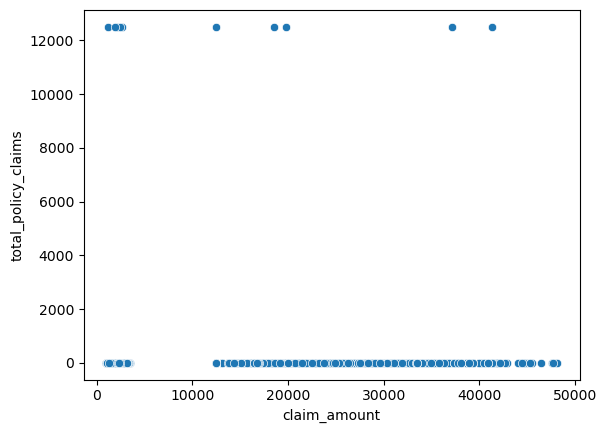

In [334]:
sns.scatterplot(data=final_df,x='claim_amount',y='total_policy_claims')
plt.show()